<style>*{direction: rtl}</style>
## بخش یک : تحلیل اولیه دیتا

### رویکرد :
علارغم تجربه قبلی در کارکردن با دیتاست های مختلف در حیطه های گوناگون (نظیر دیتاست های مکانی-زمانی از قبیل قرائت کنتورهای استان تهران یا ماتریس های سه بعدی سری زمانی فرونشست) در محیط پایتون، دیتاست مالی برای من تجربه جدیدی بود. به همین دلیل پیش از پاسخ به سوالات این مرحله، نیاز به کاوش و شناخت دیتاست و اصطلاحاً "سوار شدن" بر دیتاست داشتم. برای رسیدن به این هدف چهار گام را تعریف کردم تا لایه به لایه و از سطح به عمق، دیتا را کاوش کنم و آن را بشناسم.

برای هر گام، مختصری از دلیل انجام آن گام خواهم نوشت و پس از اجرای کد مربوط به آن، insight خودم در مورد خروجیِ آن مرحله خواهم نوشت.


<style>*{direction: rtl}</style>
### گام اول : شناخت ویژگی های کمی و کیفی دیتاست
در این گام، ویژگی های کلی دیتاست نظیر dimention و وجود دمقادیر گم شده یا ریکورد های تکراری را بررسی خواهیم کرد.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('MasterClass-FinTech01-Data.csv')  
df. head()


,monthly_income,avg_monthly_spend,credit_limit,num_transactions,account_tenure_months,cash_withdraw_ratio,late_payment_count,age,region_risk_score,marketing_score,app_login_count,employment_type,debt_to_income,payment_delay_ratio,repayment_issue
0,26867.849400,18963.331725,13797.840243,31,114,0.236576,2,60,0.106796,59.591421,24,self_employed,0.705800,0.062500,1
1,20841.350135,10425.045672,19907.767202,36,64,0.028460,0,20,0.086290,63.392608,16,other,0.500210,0.000000,1
2,28540.385984,9244.744459,23277.396544,45,50,0.330158,0,24,0.438799,62.237803,31,other,0.323918,0.000000,1
3,40506.265408,13339.455402,52088.041939,44,12,0.000000,3,60,0.290462,53.793908,20,self_employed,0.329318,0.066667,1
4,20057.103316,12374.793741,32688.989694,34,107,0.414542,2,39,0.238047,56.238840,12,salaried,0.616978,0.057143,1


In [4]:
df.shape  # rows and columns
df.info()  # data types and non-null counts
df.columns  # all column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   monthly_income         1389 non-null   float64
 1   avg_monthly_spend      1500 non-null   float64
 2   credit_limit           1500 non-null   float64
 3   num_transactions       1500 non-null   int64  
 4   account_tenure_months  1500 non-null   int64  
 5   cash_withdraw_ratio    1500 non-null   float64
 6   late_payment_count     1500 non-null   int64  
 7   age                    1500 non-null   int64  
 8   region_risk_score      1500 non-null   float64
 9   marketing_score        1500 non-null   float64
 10  app_login_count        1500 non-null   int64  
 11  employment_type        1391 non-null   object 
 12  debt_to_income         1500 non-null   float64
 13  payment_delay_ratio    1500 non-null   float64
 14  repayment_issue        1500 non-null   int64  
dtypes: f

Index(['monthly_income', 'avg_monthly_spend', 'credit_limit',
       'num_transactions', 'account_tenure_months', 'cash_withdraw_ratio',
       'late_payment_count', 'age', 'region_risk_score', 'marketing_score',
       'app_login_count', 'employment_type', 'debt_to_income',
       'payment_delay_ratio', 'repayment_issue'],
      dtype='object')

In [5]:
# Count missing values
df.isnull().sum()

# Percentage of missing values
(df.isnull().sum() / len(df) * 100).round(2)

monthly_income           7.40
avg_monthly_spend        0.00
credit_limit             0.00
num_transactions         0.00
account_tenure_months    0.00
cash_withdraw_ratio      0.00
late_payment_count       0.00
age                      0.00
region_risk_score        0.00
marketing_score          0.00
app_login_count          0.00
employment_type          7.27
debt_to_income           0.00
payment_delay_ratio      0.00
repayment_issue          0.00
dtype: float64

In [6]:
# Look for empty strings that should be NaN
df. replace('', np.nan, inplace=True)
df.isnull().sum()

monthly_income           111
avg_monthly_spend          0
credit_limit               0
num_transactions           0
account_tenure_months      0
cash_withdraw_ratio        0
late_payment_count         0
age                        0
region_risk_score          0
marketing_score            0
app_login_count            0
employment_type          109
debt_to_income             0
payment_delay_ratio        0
repayment_issue            0
dtype: int64

#### برداشت ها
>-دو ستون "درامد ماهانه" و "نوع استخدام" حدود 7 درصد داده ی گم شده دارد


### گام دوم : شناخت متغیر هدف
در این بخش، هدف اصلی ما این است که آیا این متغییر به صورت imbalance در دیتاست ما وجود دارد یا خیر.
پاسخ به این سوال، تاثیر مهمی در انتخاب روش مدل سازی ما دارد. چرا که اگر  داده بالانس نباشد و ما آن را در نظر نگرفته باشیم، مدل دچار بایاس شده و به سمت ناصحیحی سوگیری خواهد داشت.

In [ ]:
# Count target variable
df['repayment_issue'].value_counts()

# Percentage distribution
df['repayment_issue'].value_counts(normalize=True) * 100

repayment_issue
1    89.266667
0    10.733333
Name: proportion, dtype: float64

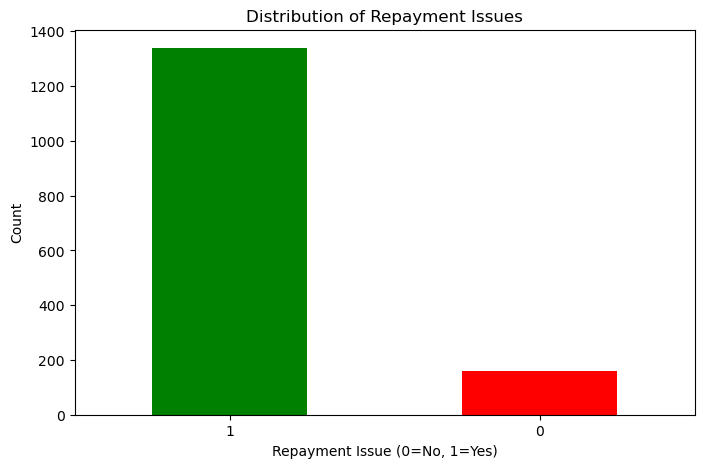

In [12]:
plt.figure(figsize=(8, 5))
df['repayment_issue'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Repayment Issues')
plt.xlabel('Repayment Issue (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



#### برداشت ها
>-متغیر هدف، به شدت imbalance است !
>- این موضوع میتواند باعث شود مدل آینده ی ما، به طور ناصحیحی 90 درصد افراد را فاقد صلاحیت دانسته و مشتریان خوش حساب را نیز به صورت اشتتباه در کتگوری مشکل دار ها قرار دهد.


### گام سوم : پیدا کردن متغییر هایی که با کمک آن، ریسک را تشخیص می توان داد

In [10]:
df['debt_to_income'].describe() 

count    1500.000000
mean        0.698925
std         0.406341
min         0.083774
25%         0.410565
50%         0.604343
75%         0.881098
max         2.000000
Name: debt_to_income, dtype: float64

In [ ]:
df[df['debt_to_income'] > 1.5] 

,monthly_income,avg_monthly_spend,credit_limit,num_transactions,account_tenure_months,cash_withdraw_ratio,late_payment_count,age,region_risk_score,marketing_score,app_login_count,employment_type,debt_to_income,payment_delay_ratio,repayment_issue
16,14689.196225,26398.233776,15807.327441,44,48,0.044773,0,35,0.384546,27.178369,25,self_employed,1.797119,0.000000,1
19,NaN,30771.421192,32633.977526,26,23,0.107547,1,62,0.023244,44.307811,24,salaried,2.000000,0.037037,1
26,NaN,31196.582660,28757.341251,31,69,0.084237,1,52,0.043259,36.476518,18,salaried,2.000000,0.031250,1
49,10881.114359,23204.928043,40906.179690,32,39,0.502770,0,53,0.070102,49.914157,19,salaried,2.000000,0.000000,1
74,7724.110568,16479.846549,20815.193413,39,84,0.073613,2,66,0.349356,48.961709,29,other,2.000000,0.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,12190.782014,22717.170876,33090.607280,38,15,0.324625,3,61,0.370544,63.985629,17,salaried,1.863471,0.076923,1
1369,15461.045011,23226.316022,29089.855745,37,99,0.313919,1,30,0.071734,46.784166,17,salaried,1.502247,0.026316,1
1395,23715.215429,78182.957492,16728.495490,34,41,0.000000,0,28,0.110703,69.574103,13,self_employed,2.000000,0.000000,1
1397,NaN,29030.825491,19197.396983,49,53,0.186496,0,22,0.211133,33.958964,25,self_employed,1.944022,0.000000,1


In [ ]:
# Example: debt_to_income analysis
df. groupby('repayment_issue')['debt_to_income'].describe()

# Example: late_payment_count
df.groupby('repayment_issue')['late_payment_count'].mean()

repayment_issue
0    0.881988
1    1.238984
Name: late_payment_count, dtype: float64

In [ ]:
# Example: debt_to_income analysis
df. groupby('repayment_issue')['debt_to_income'].describe()

# Example: late_payment_count
df.groupby('repayment_issue')['late_payment_count'].mean()

repayment_issue
0    0.881988
1    1.238984
Name: late_payment_count, dtype: float64

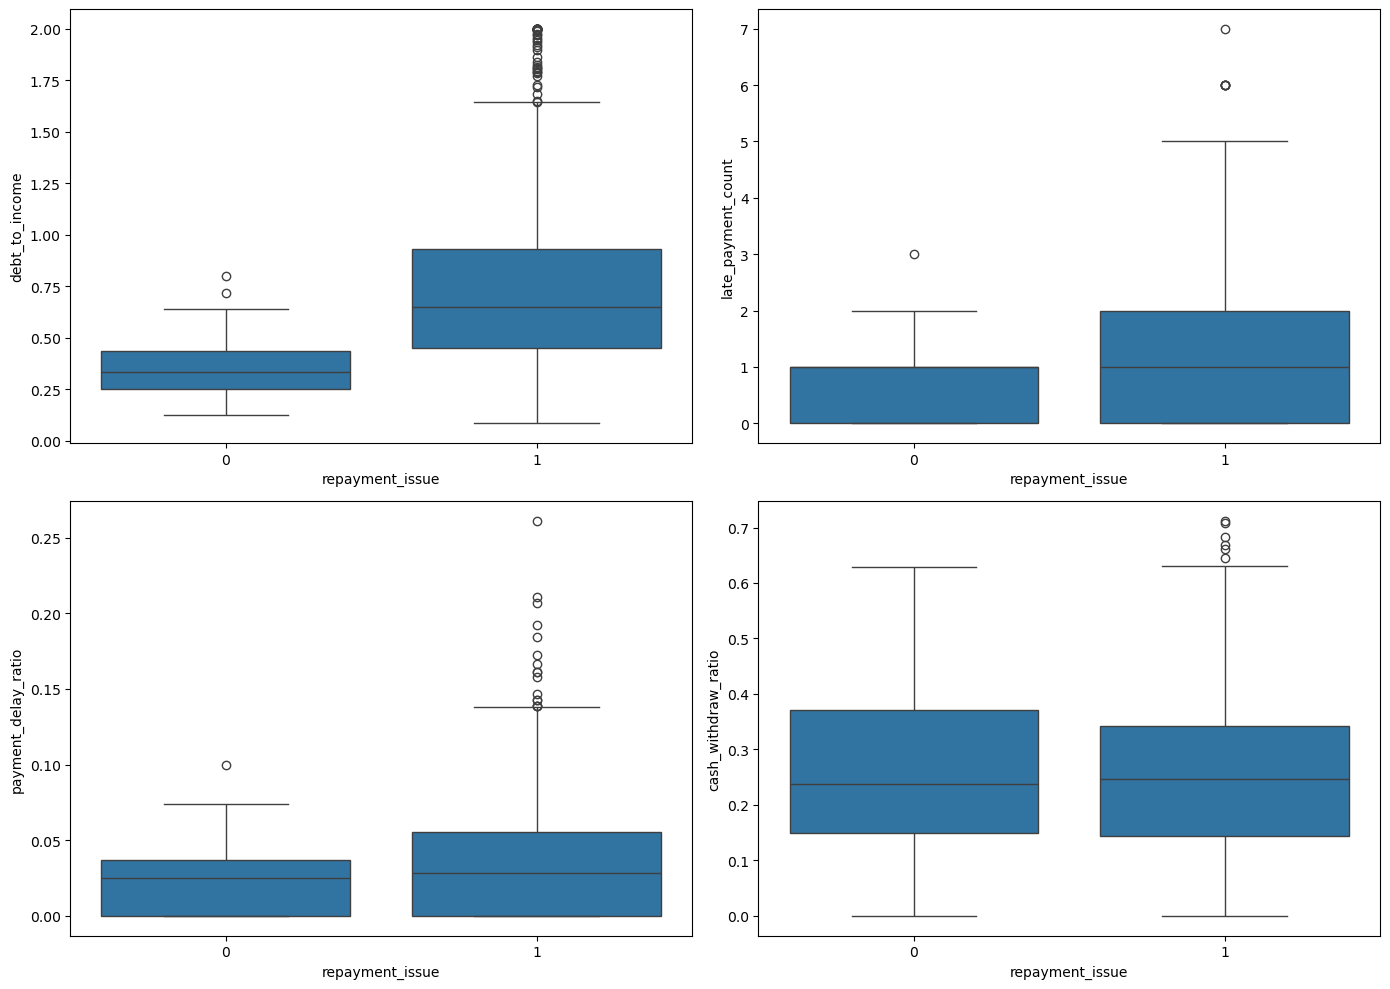

In [ ]:
# Box plots for top numeric features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(data=df, x='repayment_issue', y='debt_to_income', ax=axes[0,0])
sns.boxplot(data=df, x='repayment_issue', y='late_payment_count', ax=axes[0,1])
sns.boxplot(data=df, x='repayment_issue', y='payment_delay_ratio', ax=axes[1,0])
sns.boxplot(data=df, x='repayment_issue', y='cash_withdraw_ratio', ax=axes[1,1])

plt.tight_layout()
plt.show()

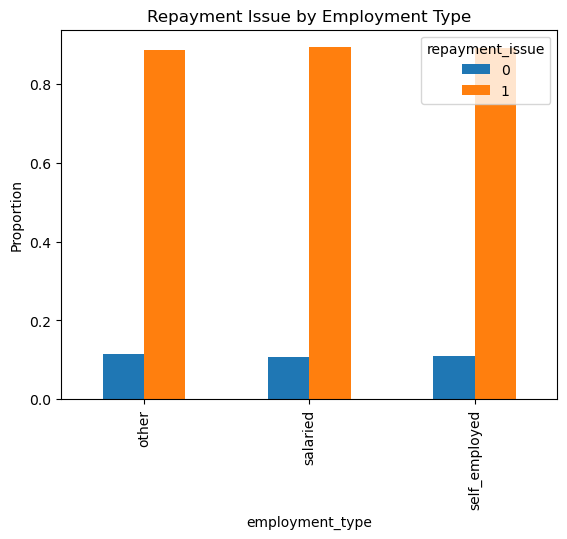

In [ ]:
# Employment type vs repayment issue
pd.crosstab(df['employment_type'], df['repayment_issue'], normalize='index').plot(kind='bar')
plt.title('Repayment Issue by Employment Type')
plt.ylabel('Proportion')
plt.show()

In [ ]:
print("="*60)
print("RED FLAG ANALYSIS:  FINANCIAL STRESS INDICATORS")
print("="*60)

# Compare groups:  repayment_issue = 0 (good) vs 1 (bad)
comparison = df.groupby('repayment_issue')[['debt_to_income', 
                                              'late_payment_count', 
                                              'payment_delay_ratio',
                                              'cash_withdraw_ratio',
                                              'avg_monthly_spend',
                                              'monthly_income']].mean()

print("\nAverage values by group:")
print(comparison)

print("\n" + "-"*60)
print("SPECIFIC RED FLAGS:")
print("-"*60)

# Red Flag 1: High Debt-to-Income
high_dti = df[df['debt_to_income'] > 0.8]
print(f"\n🚨 High DTI (>0.8): {len(high_dti)} customers ({len(high_dti)/len(df)*100:.1f}%)")
print(f"   Default rate in this group: {high_dti['repayment_issue'].mean()*100:.1f}%")

# Red Flag 2: Late Payments
late_payers = df[df['late_payment_count'] > 0]
print(f"\n🚨 Has Late Payments: {len(late_payers)} customers ({len(late_payers)/len(df)*100:.1f}%)")
print(f"   Default rate in this group: {late_payers['repayment_issue'].mean()*100:.1f}%")

# Red Flag 3: Payment Delays
delayed = df[df['payment_delay_ratio'] > 0.05]
print(f"\n🚨 Payment Delay Ratio >5%: {len(delayed)} customers ({len(delayed)/len(df)*100:.1f}%)")
print(f"   Default rate in this group: {delayed['repayment_issue'].mean()*100:.1f}%")

# Red Flag 4: High Cash Withdrawal
high_cash = df[df['cash_withdraw_ratio'] > 0.4]
print(f"\n🚨 High Cash Withdrawals (>40%): {len(high_cash)} customers ({len(high_cash)/len(df)*100:.1f}%)")
print(f"   Default rate in this group: {high_cash['repayment_issue'].mean()*100:.1f}%")

# Red Flag 5: Multiple Red Flags
df['red_flag_count'] = (
    (df['debt_to_income'] > 0.8).astype(int) +
    (df['late_payment_count'] > 0).astype(int) +
    (df['payment_delay_ratio'] > 0.05).astype(int) +
    (df['cash_withdraw_ratio'] > 0.4).astype(int)
)

print("\n" + "-"*60)
print("MULTIPLE RED FLAGS ANALYSIS:")
print(df. groupby('red_flag_count')['repayment_issue']. agg(['mean', 'count']))

RED FLAG ANALYSIS:  FINANCIAL STRESS INDICATORS

Average values by group:
                 debt_to_income  late_payment_count  payment_delay_ratio  \
repayment_issue                                                            
0                      0.344187            0.881988             0.025136   
1                      0.741578            1.238984             0.035476   

                 cash_withdraw_ratio  avg_monthly_spend  monthly_income  
repayment_issue                                                          
0                           0.254692       10096.361063    31054.329994  
1                           0.247024       15412.148437    23465.571816  

------------------------------------------------------------
SPECIFIC RED FLAGS:
------------------------------------------------------------

🚨 High DTI (>0.8): 464 customers (30.9%)
   Default rate in this group: 99.8%

🚨 Has Late Payments: 1062 customers (70.8%)
   Default rate in this group: 90.4%

🚨 Payment Delay Rati

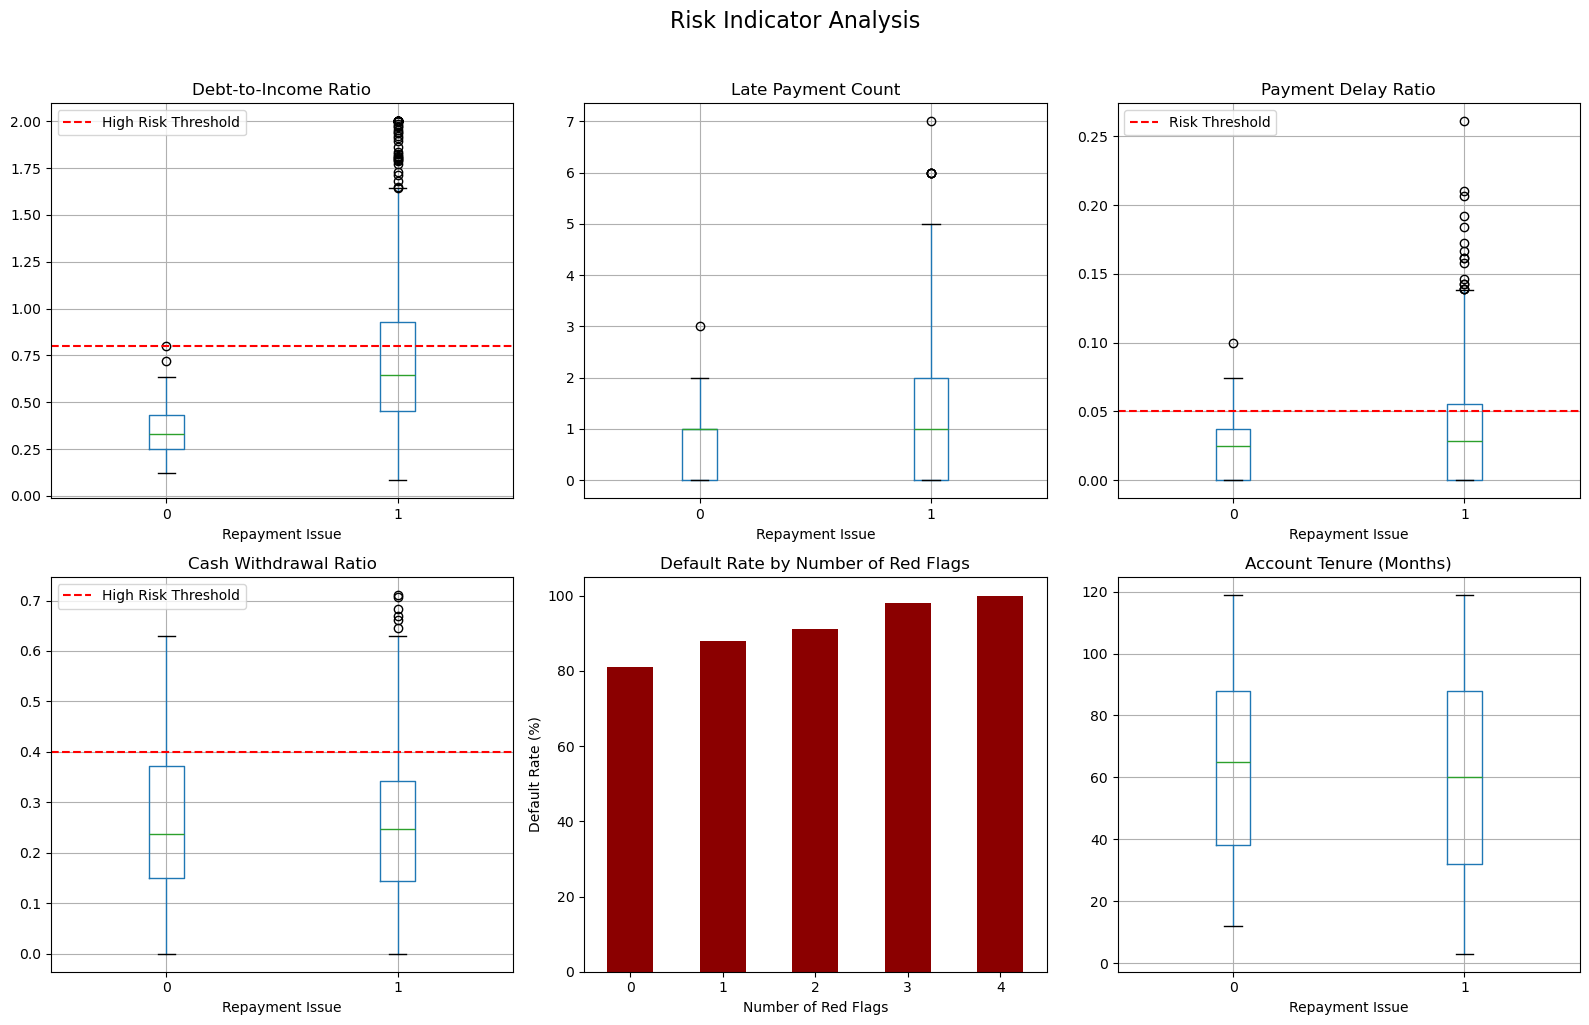

In [ ]:
# Create subplots for key risk indicators
fig, axes = plt. subplots(2, 3, figsize=(16, 10))

# Plot 1: Debt-to-Income
df. boxplot(column='debt_to_income', by='repayment_issue', ax=axes[0,0])
axes[0,0].set_title('Debt-to-Income Ratio')
axes[0,0].set_xlabel('Repayment Issue')
axes[0,0].axhline(y=0.8, color='r', linestyle='--', label='High Risk Threshold')
axes[0,0].legend()

# Plot 2: Late Payment Count
df.boxplot(column='late_payment_count', by='repayment_issue', ax=axes[0,1])
axes[0,1].set_title('Late Payment Count')
axes[0,1].set_xlabel('Repayment Issue')

# Plot 3: Payment Delay Ratio
df.boxplot(column='payment_delay_ratio', by='repayment_issue', ax=axes[0,2])
axes[0,2].set_title('Payment Delay Ratio')
axes[0,2].set_xlabel('Repayment Issue')
axes[0,2].axhline(y=0.05, color='r', linestyle='--', label='Risk Threshold')
axes[0,2].legend()

# Plot 4: Cash Withdrawal Ratio
df.boxplot(column='cash_withdraw_ratio', by='repayment_issue', ax=axes[1,0])
axes[1,0].set_title('Cash Withdrawal Ratio')
axes[1,0].set_xlabel('Repayment Issue')
axes[1,0].axhline(y=0.4, color='r', linestyle='--', label='High Risk Threshold')
axes[1,0].legend()

# Plot 5: Red Flag Count Distribution
red_flag_default = df. groupby('red_flag_count')['repayment_issue'].mean() * 100
red_flag_default. plot(kind='bar', ax=axes[1,1], color='darkred')
axes[1,1].set_title('Default Rate by Number of Red Flags')
axes[1,1].set_xlabel('Number of Red Flags')
axes[1,1].set_ylabel('Default Rate (%)')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=0)

# Plot 6: Account Tenure
df. boxplot(column='account_tenure_months', by='repayment_issue', ax=axes[1,2])
axes[1,2].set_title('Account Tenure (Months)')
axes[1,2].set_xlabel('Repayment Issue')

plt.suptitle('Risk Indicator Analysis', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
print("="*60)
print("OUTLIER DETECTION")
print("="*60)

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check key numeric columns for outliers
numeric_columns = ['monthly_income', 'avg_monthly_spend', 'credit_limit', 
                   'debt_to_income', 'age', 'cash_withdraw_ratio', 
                   'account_tenure_months']

outlier_summary = []

for col in numeric_columns: 
    if col in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df, col)
        outlier_summary.append({
            'Column': col,
            'Outlier_Count': len(outliers),
            'Outlier_Percentage': f"{len(outliers)/len(df)*100:.2f}%",
            'Lower_Bound': f"{lower:.2f}",
            'Upper_Bound': f"{upper:.2f}",
            'Min': f"{df[col].min():.2f}",
            'Max': f"{df[col].max():.2f}"
        })

outlier_df = pd.DataFrame(outlier_summary)
print("\n", outlier_df.to_string(index=False))

# Specific outlier checks
print("\n" + "-"*60)
print("SPECIFIC OUTLIER PATTERNS:")
print("-"*60)

# Extreme DTI
extreme_dti = df[df['debt_to_income'] > 1.5]
print(f"\n⚠️  Extreme DTI (>1.5): {len(extreme_dti)} cases")
print(f"   These customers spend 150%+ of their income!")
print(f"   Default rate:  {extreme_dti['repayment_issue'].mean()*100:.1f}%")

# Very young/old customers
print(f"\n⚠️  Age < 20:  {len(df[df['age'] < 20])} customers")
print(f"⚠️  Age > 70: {len(df[df['age'] > 70])} customers")

# Extreme account tenure
print(f"\n⚠️  Account tenure < 6 months: {len(df[df['account_tenure_months'] < 6])} customers")
print(f"   Default rate: {df[df['account_tenure_months'] < 6]['repayment_issue'].mean()*100:.1f}%")

OUTLIER DETECTION

                Column  Outlier_Count Outlier_Percentage Lower_Bound Upper_Bound     Min       Max
       monthly_income             54              3.60%     -397.52    46371.16 6023.92 102856.76
    avg_monthly_spend             48              3.20%    -2006.42    30110.20 3433.10  78182.96
         credit_limit             41              2.73%     1988.88    52141.18 9389.32  83707.39
       debt_to_income             66              4.40%       -0.30        1.59    0.08      2.00
                  age              0              0.00%       -8.00       96.00   20.00     69.00
  cash_withdraw_ratio              5              0.33%       -0.16        0.65    0.00      0.71
account_tenure_months              0              0.00%      -49.50      170.50    3.00    119.00

------------------------------------------------------------
SPECIFIC OUTLIER PATTERNS:
------------------------------------------------------------

⚠️  Extreme DTI (>1.5): 84 cases
   These cus

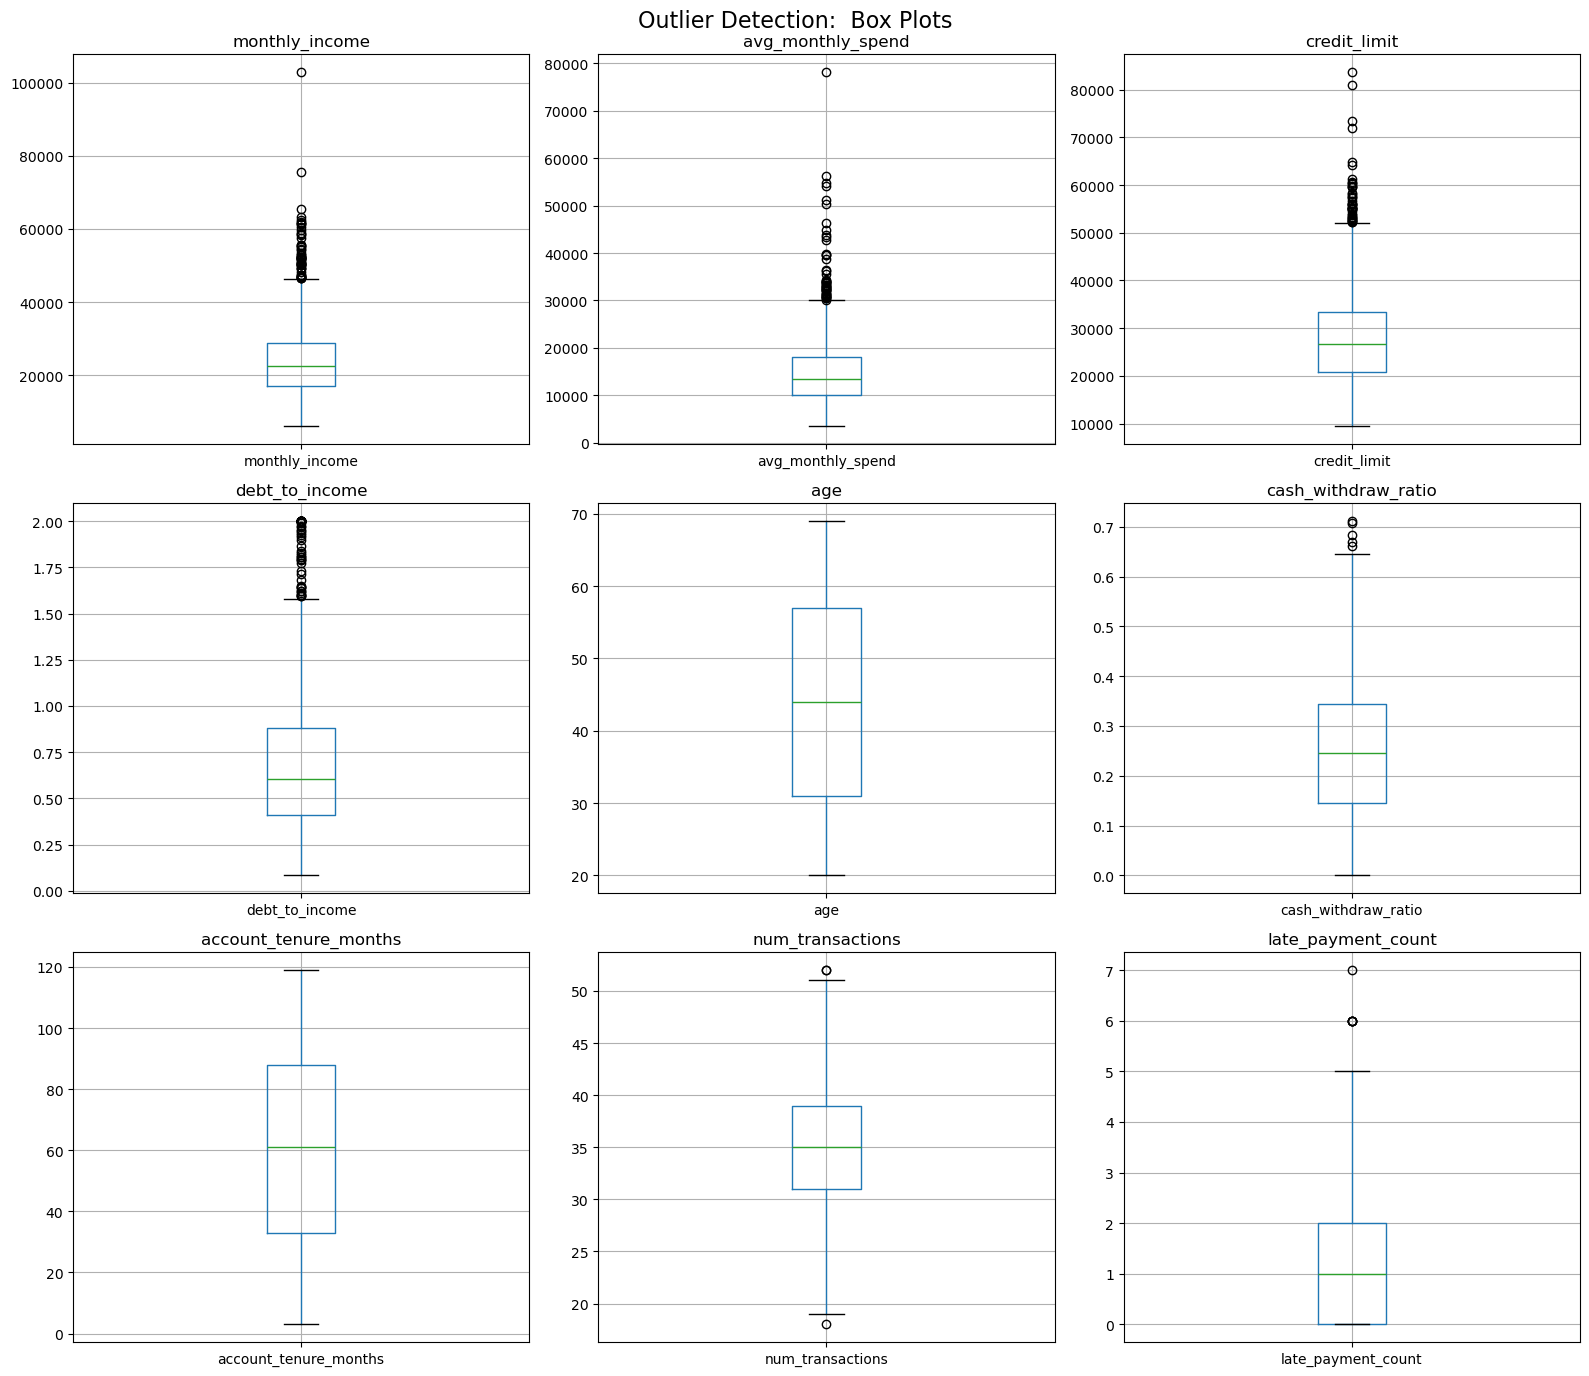

ModuleNotFoundError: No module named 'scipy'

In [ ]:
# Create comprehensive outlier visualization
fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.flatten()

outlier_cols = ['monthly_income', 'avg_monthly_spend', 'credit_limit', 
                'debt_to_income', 'age', 'cash_withdraw_ratio', 
                'account_tenure_months', 'num_transactions', 'late_payment_count']

for idx, col in enumerate(outlier_cols):
    if col in df.columns:
        # Box plot
        df. boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'{col}')
        axes[idx].set_ylabel('')

plt.suptitle('Outlier Detection:  Box Plots', fontsize=16)
plt.tight_layout()
plt.show()

# Alternative: Z-score visualization
from scipy import stats

print("\n" + "="*60)
print("Z-SCORE OUTLIER DETECTION (|Z| > 3)")
print("="*60)

for col in ['debt_to_income', 'monthly_income', 'avg_monthly_spend']: 
    if col in df.columns:
        z_scores = np.abs(stats.zscore(df[col]. dropna()))
        outliers = len(z_scores[z_scores > 3])
        print(f"{col}: {outliers} extreme outliers (Z-score > 3)")

In [ ]:
print("="*60)
print("CLASS IMBALANCE ANALYSIS")
print("="*60)

# Distribution
class_dist = df['repayment_issue'].value_counts()
class_pct = df['repayment_issue']. value_counts(normalize=True) * 100

print("\nClass Distribution:")
print(f"Repayment Issue = 1 (Default):  {class_dist[1]} ({class_pct[1]:.2f}%)")  # Fixed here
print(f"Repayment Issue = 0 (No Issue): {class_dist[0]} ({class_pct[0]:.2f}%)")

imbalance_ratio = class_dist[1] / class_dist[0]
print(f"\nImbalance Ratio:  {imbalance_ratio:.2f}:1")
print(f"   (For every 1 non-defaulter, there are {imbalance_ratio:.1f} defaulters)")

# Why this matters
print("\n" + "-"*60)
print("⚠️  IMPLICATIONS OF IMBALANCE:")
print("-"*60)
print(f"""
1. Model Bias:  A naive model predicting "everyone defaults" would be 
   {class_pct[1]:.1f}% accurate, but useless! 
   
2. Evaluation Metrics:  Accuracy is misleading.  Must use: 
   - Precision, Recall, F1-Score
   - ROC-AUC
   - Confusion Matrix
   
3. Sampling Strategy Needed: 
   - SMOTE (Synthetic Minority Over-sampling)
   - Random Under-sampling of majority class
   - Class weights in model
   
4. Business Cost: Missing a defaulter (False Negative) costs more 
   than rejecting a good customer (False Positive)
""")

CLASS IMBALANCE ANALYSIS

Class Distribution:
Repayment Issue = 1 (Default):  1339 (89.27%)
Repayment Issue = 0 (No Issue): 161 (10.73%)

Imbalance Ratio:  8.32:1
   (For every 1 non-defaulter, there are 8.3 defaulters)

------------------------------------------------------------
⚠️  IMPLICATIONS OF IMBALANCE:
------------------------------------------------------------

1. Model Bias:  A naive model predicting "everyone defaults" would be 
   89.3% accurate, but useless! 

2. Evaluation Metrics:  Accuracy is misleading.  Must use: 
   - Precision, Recall, F1-Score
   - ROC-AUC
   - Confusion Matrix

3. Sampling Strategy Needed: 
   - SMOTE (Synthetic Minority Over-sampling)
   - Random Under-sampling of majority class
   - Class weights in model

4. Business Cost: Missing a defaulter (False Negative) costs more 
   than rejecting a good customer (False Positive)



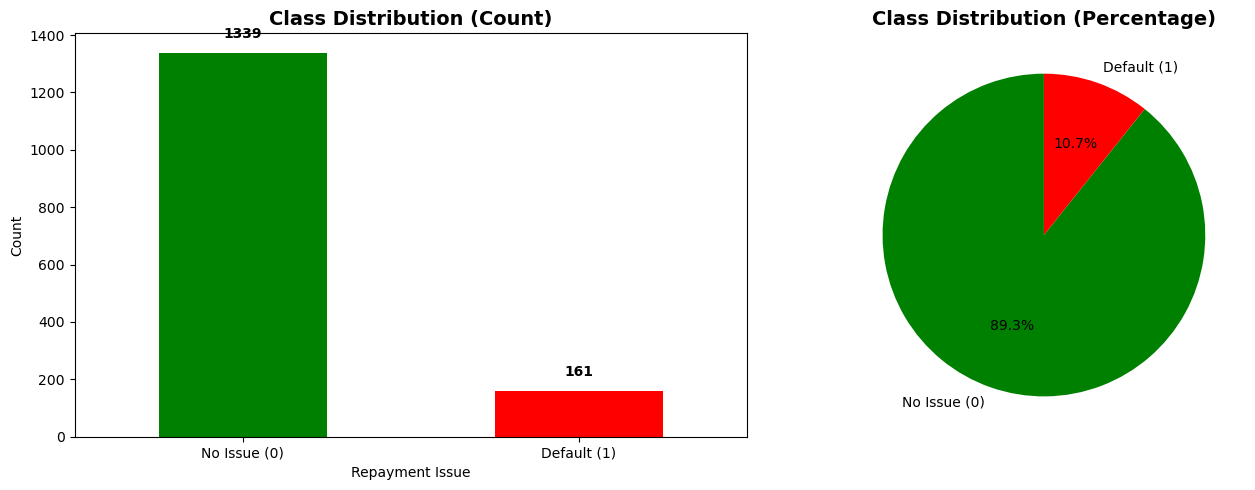

In [ ]:
# Visualization of imbalance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count
class_dist. plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Repayment Issue')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Issue (0)', 'Default (1)'], rotation=0)
for i, v in enumerate(class_dist):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Plot 2: Percentage (Pie Chart)
axes[1].pie(class_dist, labels=['No Issue (0)', 'Default (1)'], 
            autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
print("="*60)
print("SUMMARY:  KEY FINDINGS FOR EDA REPORT")
print("="*60)

print("\n📊 RED FLAGS IDENTIFIED:")
print(f"  - {len(df[df['debt_to_income'] > 0.8])} customers with DTI > 0.8")
print(f"  - {len(df[df['late_payment_count'] > 0])} customers with late payment history")
print(f"  - {len(df[df['payment_delay_ratio'] > 0.05])} customers with >5% payment delays")
print(f"  - Customers with 3+ red flags have {df[df['red_flag_count'] >= 3]['repayment_issue'].mean()*100:.1f}% default rate")

print("\n🎯 OUTLIERS DETECTED:")
print(f"  - {len(df[df['debt_to_income'] > 1.5])} customers spending >150% of income")
print(f"  - Age range: {df['age'].min():.0f} to {df['age']. max():.0f} years")
print(f"  - {len(df[df['account_tenure_months'] < 6])} very new customers (<6 months)")

print("\n⚖️ CLASS IMBALANCE:")
print(f"  - {class_pct[1]:.1f}% defaults vs {class_pct[0]:.1f}% non-defaults")
print(f"  - Imbalance ratio: {imbalance_ratio:.1f}:1")
print(f"  - ⚠️  Requires special handling in modeling phase")

SUMMARY:  KEY FINDINGS FOR EDA REPORT

📊 RED FLAGS IDENTIFIED:
  - 464 customers with DTI > 0.8
  - 1062 customers with late payment history
  - 422 customers with >5% payment delays
  - Customers with 3+ red flags have 98.2% default rate

🎯 OUTLIERS DETECTED:
  - 84 customers spending >150% of income
  - Age range: 20 to 69 years
  - 37 very new customers (<6 months)

⚖️ CLASS IMBALANCE:
  - 89.3% defaults vs 10.7% non-defaults
  - Imbalance ratio: 8.3:1
  - ⚠️  Requires special handling in modeling phase


In [ ]:
###-

In [ ]:
print("="*60)
print("DEEP DIVE:  OUTLIER RISK ANALYSIS")
print("="*60)

# 1. Are high earners safer?
income_threshold = 46371
high_income = df[df['monthly_income'] > income_threshold]
normal_income = df[df['monthly_income'] <= income_threshold]

print(f"\n📊 Income Outliers Analysis:")
print(f"High income (>${income_threshold: ,.0f}): {len(high_income)} customers")
print(f"   Default rate: {high_income['repayment_issue'].mean()*100:.1f}%")
print(f"   Average DTI: {high_income['debt_to_income'].mean():.2f}")
print(f"\nNormal income:  {len(normal_income)} customers")
print(f"   Default rate: {normal_income['repayment_issue'].mean()*100:.1f}%")
print(f"   Average DTI: {normal_income['debt_to_income'].mean():.2f}")

# 2. Spending outliers
spend_threshold = 30110
high_spend = df[df['avg_monthly_spend'] > spend_threshold]
normal_spend = df[df['avg_monthly_spend'] <= spend_threshold]

print(f"\n📊 Spending Outliers Analysis:")
print(f"High spenders (>${spend_threshold:,.0f}): {len(high_spend)} customers")
print(f"   Default rate: {high_spend['repayment_issue'].mean()*100:.1f}%")
print(f"   Average income: ${high_spend['monthly_income'].mean():,.2f}")
print(f"   Average DTI: {high_spend['debt_to_income'].mean():.2f}")

# 3. The "impossible" DTI group
impossible_dti = df[df['debt_to_income'] > 1.5]
print(f"\n🚨 'Impossible' DTI (>1.5) Deep Dive:")
print(f"Count: {len(impossible_dti)}")
print(f"Default rate: {impossible_dti['repayment_issue'].mean()*100:.1f}%")
print(f"Average income: ${impossible_dti['monthly_income'].mean():,.2f}")
print(f"Average spend: ${impossible_dti['avg_monthly_spend'].mean():,.2f}")
print(f"Average DTI: {impossible_dti['debt_to_income']. mean():.2f}")

# 4. Outlier combinations - most dangerous profile
dangerous_profile = df[
    (df['debt_to_income'] > 1.5) & 
    (df['account_tenure_months'] < 12)
]
print(f"\n💀 Most Dangerous Profile (DTI>1.5 AND New Customer):")
print(f"Count: {len(dangerous_profile)}")
print(f"Default rate: {dangerous_profile['repayment_issue'].mean()*100:.1f}%")

DEEP DIVE:  OUTLIER RISK ANALYSIS

📊 Income Outliers Analysis:
High income (>$ 46,371): 54 customers
   Default rate: 74.1%
   Average DTI: 0.26

Normal income:  1335 customers
   Default rate: 89.4%
   Average DTI: 0.71

📊 Spending Outliers Analysis:
High spenders (>$30,110): 48 customers
   Default rate: 100.0%
   Average income: $23,062.20
   Average DTI: 1.61

🚨 'Impossible' DTI (>1.5) Deep Dive:
Count: 84
Default rate: 100.0%
Average income: $14,491.67
Average spend: $28,532.87
Average DTI: 1.81

💀 Most Dangerous Profile (DTI>1.5 AND New Customer):
Count: 3
Default rate: 100.0%


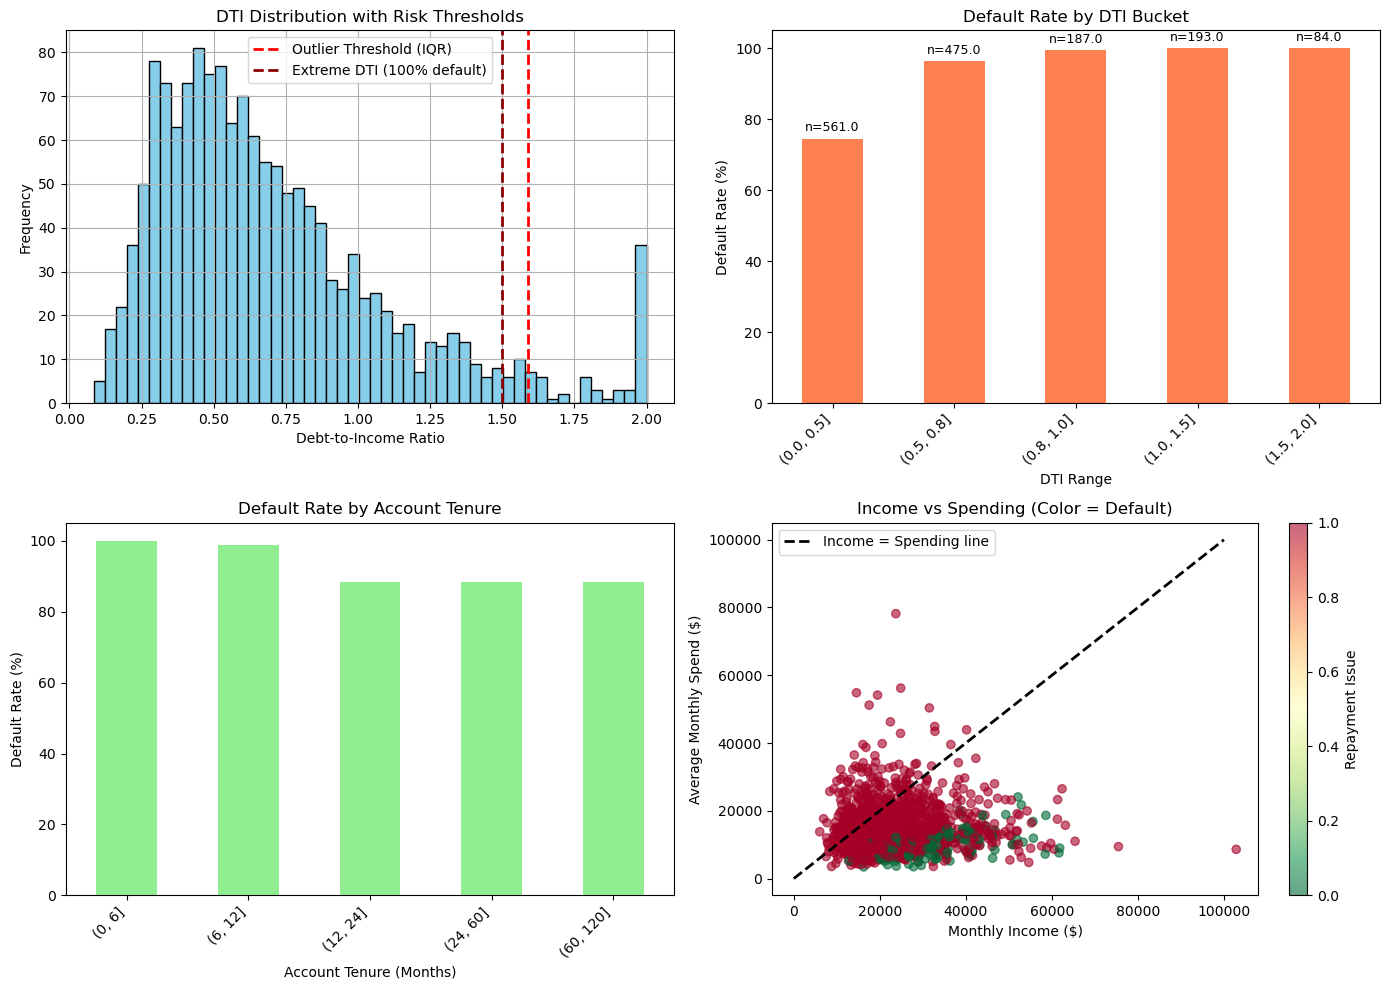

In [ ]:
# Create outlier impact visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: DTI Distribution with outlier threshold
ax1 = axes[0, 0]
df['debt_to_income'].hist(bins=50, ax=ax1, color='skyblue', edgecolor='black')
ax1.axvline(x=1.59, color='red', linestyle='--', linewidth=2, label='Outlier Threshold (IQR)')
ax1.axvline(x=1.5, color='darkred', linestyle='--', linewidth=2, label='Extreme DTI (100% default)')
ax1.set_xlabel('Debt-to-Income Ratio')
ax1.set_ylabel('Frequency')
ax1.set_title('DTI Distribution with Risk Thresholds')
ax1.legend()

# Plot 2: Default rate by DTI buckets
ax2 = axes[0, 1]
dti_bins = [0, 0.5, 0.8, 1.0, 1.5, 2.0]
df['dti_bucket'] = pd.cut(df['debt_to_income'], bins=dti_bins)
dti_analysis = df.  groupby('dti_bucket')['repayment_issue'].agg(['mean', 'count'])
dti_analysis['mean'].mul(100).plot(kind='bar', ax=ax2, color='coral')
ax2.set_xlabel('DTI Range')
ax2.set_ylabel('Default Rate (%)')
ax2.set_title('Default Rate by DTI Bucket')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
for i, (idx, row) in enumerate(dti_analysis.iterrows()):
    ax2.text(i, row['mean']*100 + 2, f"n={row['count']}", ha='center', fontsize=9)

# Plot 3: Account tenure vs default
ax3 = axes[1, 0]
tenure_bins = [0, 6, 12, 24, 60, 120]
df['tenure_bucket'] = pd.cut(df['account_tenure_months'], bins=tenure_bins)
tenure_analysis = df. groupby('tenure_bucket')['repayment_issue'].agg(['mean', 'count'])
tenure_analysis['mean'].mul(100).plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_xlabel('Account Tenure (Months)')
ax3.set_ylabel('Default Rate (%)')
ax3.set_title('Default Rate by Account Tenure')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Plot 4: Income vs Spending (outliers highlighted)
ax4 = axes[1, 1]
scatter = ax4.scatter(df['monthly_income'], df['avg_monthly_spend'], 
                     c=df['repayment_issue'], cmap='RdYlGn_r', alpha=0.6)
ax4.plot([0, 100000], [0, 100000], 'k--', label='Income = Spending line', linewidth=2)
ax4.set_xlabel('Monthly Income ($)')
ax4.set_ylabel('Average Monthly Spend ($)')
ax4.set_title('Income vs Spending (Color = Default)')
ax4.legend()
plt.colorbar(scatter, ax=ax4, label='Repayment Issue')

plt.tight_layout()
plt.show()

# Clean up temporary columns
df. drop(['dti_bucket', 'tenure_bucket'], axis=1, inplace=True)

</div>
